In [ ]:
"""
Created on Thu Mar 30 11:42 2023

This script is to check the reference melt for all ice shelves

@author: Clara Burgard
"""

In [1]:
import xarray as xr
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import basal_melt_param.useful_functions as uf
import basal_melt_param.melt_functions as meltf
from basal_melt_param.constants import *
import basal_melt_param.T_S_profile_functions as tspf
import seaborn as sns
from matplotlib import cm
import cartopy
import cartopy.crs as ccrs
import matplotlib as mpl
import cmocean
import glob

In [ ]:
%matplotlib qt5

FIXED MASK FILE FOR OPM016

In [2]:
inputpath_mask = '/bettik/burgardc/SCRIPTS/basal_melt_param/data/interim/ANTARCTICA_IS_MASKS/nemo_5km_OPM016/'
file_isf_orig = xr.open_dataset(inputpath_mask+'nemo_5km_isf_masks_and_info_and_distance_new_oneFRIS.nc')
home_path = '/bettik/burgardc/'
plot_path='/bettik/burgardc/PLOTS/summer_paper_plots/'

In [3]:
ref_Gt_list = []
ref_box1_list = []


run_list = ['OPM031','OPM021','OPM018','OPM016','OPM006','ctrl94','isf94','isfru94'] #'OPM026',
for n,nemo_run in enumerate(run_list):
    if nemo_run in ['ctrl94','isf94','isfru94']:
        outputpath_melt = home_path+'DATA/SUMMER_PAPER/processed/OCEAN_MELT_RATE_TUNING/nemo_5km_'+nemo_run+'/'
    else:
        outputpath_melt = home_path+'DATA/BASAL_MELT_PARAM/processed/MELT_RATE/nemo_5km_'+nemo_run+'/'
    NEMO_melt_rates_1D = xr.open_dataset(outputpath_melt+'melt_rates_1D_NEMO_oneFRIS.nc')
    ref_Gt = NEMO_melt_rates_1D['melt_Gt_per_y_tot']
    ref_Gt_list.append(ref_Gt.assign_coords({'nemo_run': nemo_run}))
    NEMO_box1_myr = xr.open_dataset(outputpath_melt+'melt_rates_box1_NEMO_oneFRIS.nc')
    ref_box1 = NEMO_box1_myr['mean_melt_box1_myr']
    ref_box1_list.append(ref_box1.assign_coords({'nemo_run': nemo_run}))

In [4]:
ref_Gt_all = xr.concat(ref_Gt_list, dim='nemo_run')
ref_box1_all = xr.concat(ref_box1_list, dim='nemo_run')

In [5]:
ref_Gt_all = ref_Gt_all.assign_coords({'time': range(1,len(ref_Gt_all.time)+1)})
ref_box1_all = ref_box1_all.assign_coords({'time': range(1,len(ref_box1_all.time)+1)})

  0%|          | 0/35 [00:00<?, ?it/s]

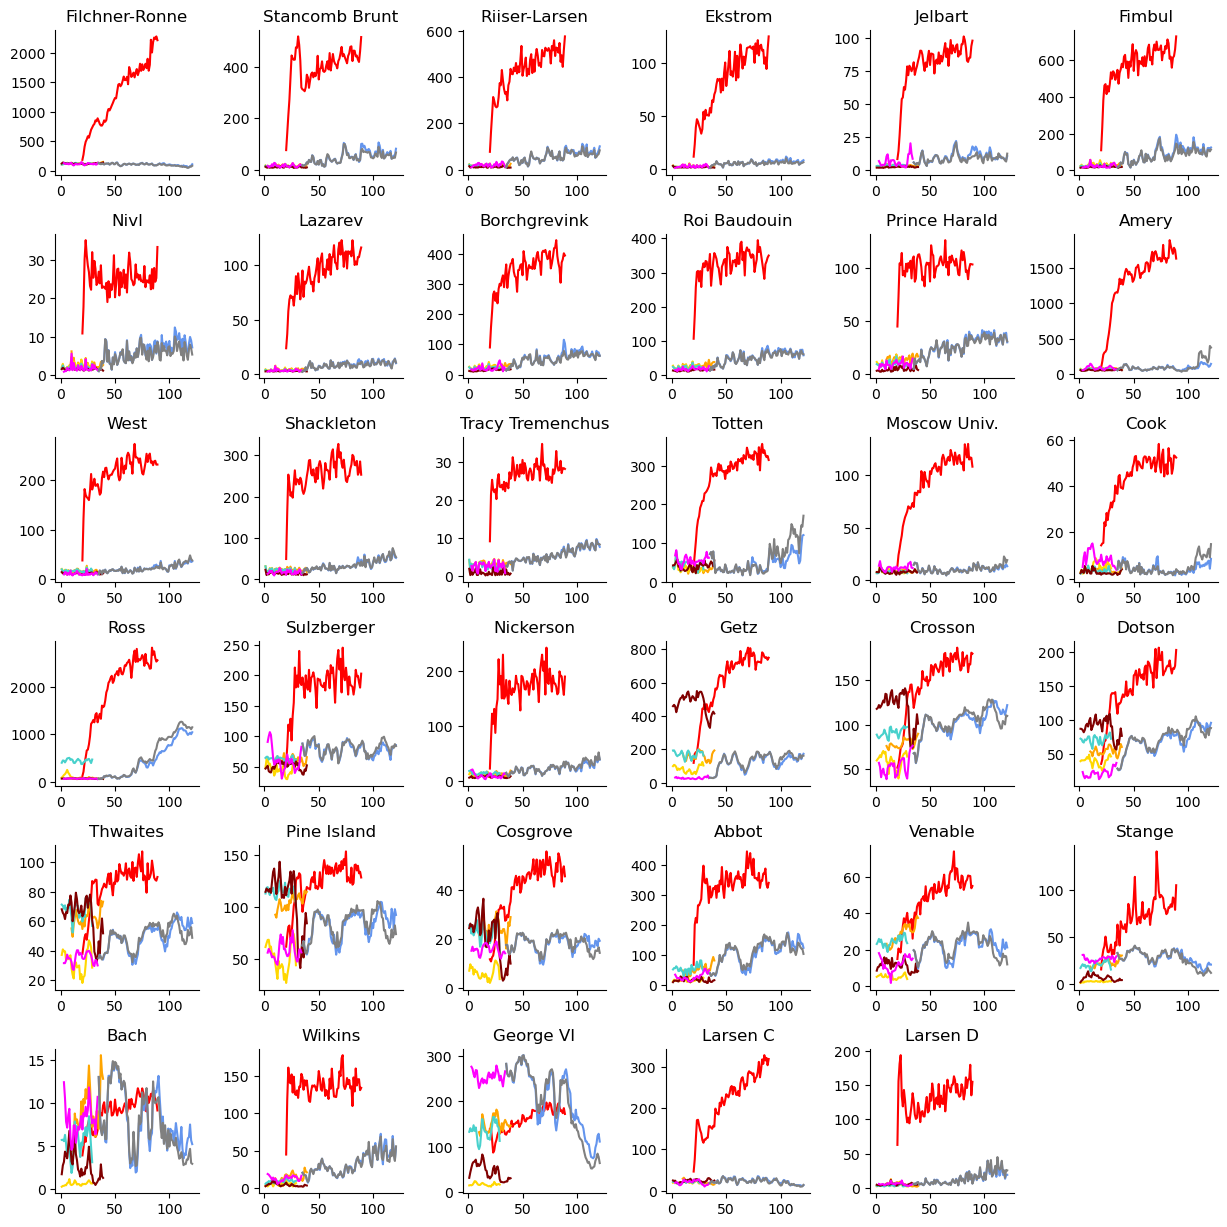

In [6]:
regions = ['Weddell','Bellingshausen','Amundsen','Ross','East 1','East 2','Dronning Maud Land']
colors = ['red','orange','gold','mediumturquoise','maroon','magenta','cornflowerblue','grey','yellowgreen']

f = plt.figure()
f.set_size_inches(8.25*1.5, 8.25*1.5)

ax={}

leg_hdl = []

i = 0

sorted_isf_all = [11,69,43,12,70,44,13,58,71,45,30,31,61,73,47,48,33,18,10,65,51,22,38,52,23,66,53,39,24,40,54,75,25,42,55]

for kisf in tqdm(sorted_isf_all):
    
        
    ax[i] = f.add_subplot(6,6,i+1)
    
    for n,nrun in enumerate(ref_Gt_all.nemo_run):
    #for n,nrun in enumerate(['ctrl94','isf94','isfru94']):
        
        ax[i].plot(ref_Gt_all.time, ref_Gt_all.sel(nemo_run=nrun, Nisf=kisf), color=colors[n])

    #if kisf == 23:
    #    ax[i].set_title('Tracy Tremenchus')
    #elif kisf == 24:
    #    ax[i].set_title('Conger/Glenzer')
    #elif kisf == 110:
    #    ax[i].set_title('Ekström')
    #else:
    ax[i].set_title(str(file_isf_orig['isf_name'].sel(Nisf=kisf).values))
    #ax[i].set_xlim(0,60)
    #ax[i].axvline(x=30, c='k', linestyle='--')

    i = i+1


f.subplots_adjust(bottom=0.05, wspace=0.1)

f.tight_layout()
sns.despine()
plt.savefig(plot_path+'timeseries_melt_all_training.pdf')

In [ ]:
nrun

In [ ]:
str(file_isf_1970['isf_name'].sel(Nisf=kisf).values)

In [ ]:
areas_bf663.Nisf.values